In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


array([[<Axes: title={'center': 'charges'}>]], dtype=object)

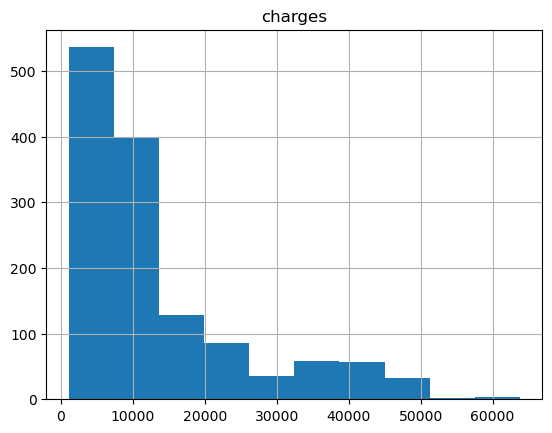

In [4]:
insurance.hist('charges')

In [5]:
insurance['log_charges'] = np.log2(insurance['charges'])

In [6]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448
1,18,male,33.770,1,no,southeast,1725.55230,10.752842
2,28,male,33.000,3,no,southeast,4449.46200,12.119415
3,33,male,22.705,0,no,northwest,21984.47061,14.424197
4,32,male,28.880,0,no,northwest,3866.85520,11.916945


array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

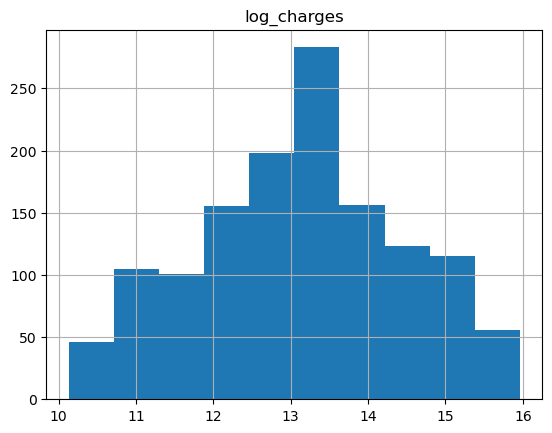

In [7]:
insurance.hist('log_charges')

In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [9]:
numeric_data = insurance.select_dtypes(np.number)

In [10]:
numeric_data

,age,bmi,children,charges,log_charges
0,19,27.900,0,16884.92400,14.043448
1,18,33.770,1,1725.55230,10.752842
2,28,33.000,3,4449.46200,12.119415
3,33,22.705,0,21984.47061,14.424197
4,32,28.880,0,3866.85520,11.916945
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,13.371851
1334,18,31.920,0,2205.98080,11.107205
1335,18,36.850,0,1629.83350,10.670509
1336,21,25.800,0,2007.94500,10.971504


In [11]:
corr = numeric_data.corr()

In [12]:
corr

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


In [13]:
corr['charges']

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
log_charges    0.892964
Name: charges, dtype: float64

In [14]:
predictor = ['age','bmi']


In [15]:
cat_data = insurance.select_dtypes('O')

In [16]:
cat_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


<Axes: title={'center': 'log_charges'}, xlabel='sex'>

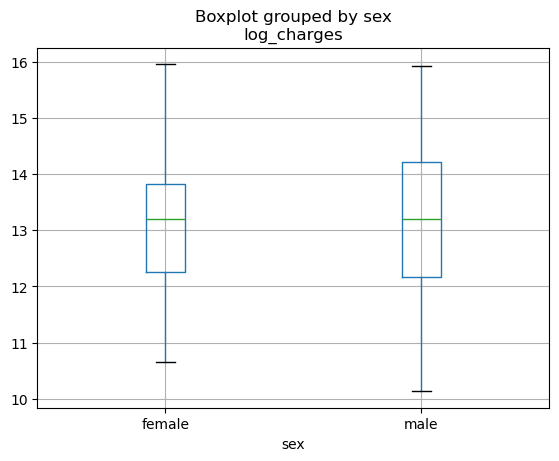

In [17]:
insurance.boxplot('log_charges',by = "sex")

<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

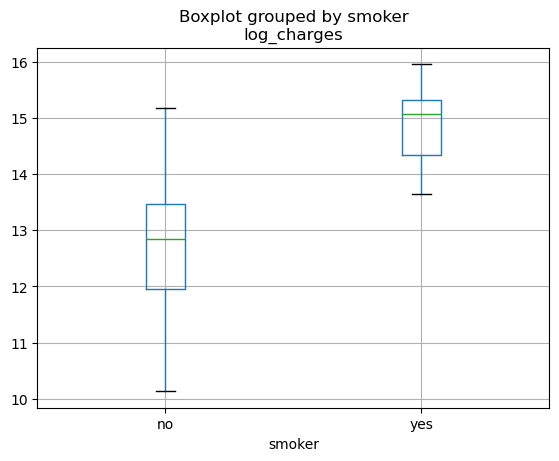

In [18]:
insurance.boxplot('log_charges',by = "smoker")

<Axes: title={'center': 'log_charges'}, xlabel='region'>

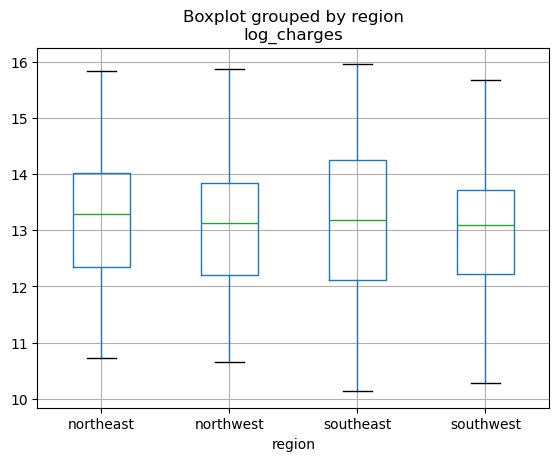

In [19]:
insurance.boxplot('log_charges',by = "region")

In [20]:
insurance['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [21]:
insurance['is_smoker'] = insurance['smoker'] == 'yes'

In [22]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,log_charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,14.043448,True
1,18,male,33.770,1,no,southeast,1725.55230,10.752842,False
2,28,male,33.000,3,no,southeast,4449.46200,12.119415,False
3,33,male,22.705,0,no,northwest,21984.47061,14.424197,False
4,32,male,28.880,0,no,northwest,3866.85520,11.916945,False


In [23]:
predictor.append('is_smoker')

In [24]:
predictor

['age', 'bmi', 'is_smoker']

# SPLITTING INTO X & Y

In [25]:
x = insurance[predictor]
y = insurance['log_charges']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [27]:
insurance_model = LinearRegression()

In [28]:
insurance_model.fit(x_train,y_train)

LinearRegression()

In [29]:
x_test.head()

,age,bmi,is_smoker
559,19,35.53,False
1087,57,31.54,False
1020,51,37.00,False
460,49,36.63,False
802,21,22.30,False


In [30]:
y_pred_test = insurance_model.predict(x_test)

In [31]:
y_pred_test

array([11.74041885, 13.57755128, 13.35619666, 13.25125352, 11.65186771,
       14.5403469 , 13.26377374, 13.48581175, 12.00397324, 14.72570589,
       13.62733479, 13.64372205, 12.69182266, 12.79382117, 11.6749291 ,
       13.10993108, 12.25570361, 12.42644904, 13.74808329, 13.85036636,
       13.35268294, 14.55680767, 12.97525242, 13.15839096, 11.61353734,
       12.73551632, 12.82032752, 13.15446322, 12.40075319, 12.14538199,
       13.58832103, 12.36665029, 15.46921526, 13.90713117, 15.26611503,
       13.27547066, 14.50345447, 13.91831495, 13.73423944, 15.18268342,
       12.15297854, 13.66793919, 13.17589081, 13.75633525, 12.16875828,
       13.68516967, 11.78712828, 14.35227188, 13.08658514, 13.53835446,
       13.77733602, 13.45169368, 11.82066444, 12.8963888 , 13.79241419,
       12.51196925, 15.1123843 , 13.77771969, 11.77893465, 11.79700123,
       12.23881365, 13.8052931 , 14.05768869, 11.83435084, 13.80411174,
       13.13980887, 13.138287  , 13.46999122, 11.58498318, 13.99

# MODEL TESTING

In [32]:
y_pred_train = insurance_model.predict(x_train)

In [33]:
mse_train = mean_squared_error(y_train,y_pred_train)

In [34]:
mse_test = mean_squared_error(y_test,y_pred_test)

In [35]:
mse_train

0.45188410556701514

In [36]:
mse_test

0.4396811462571399

In [37]:
r2_score(y_train,y_pred_train)

0.7401147505859649

In [38]:
r2_score(y_test,y_pred_test)

0.760697426214619

In [39]:
residuals = y_train - y_pred_train

In [40]:
residuals.sum().round()

-0.0

In [41]:
import pickle

In [42]:
pickle.dump(insurance_model,open('insurance_model.pkl','wb'))

In [43]:
insurance_model = pickle.load(open('insurance_model.pkl','rb'))

# WEB APP

In [44]:
%%writefile insurance_web.py
import streamlit as st

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pickle

#Load data
insurance = pd.read_csv('insurance.csv')

insurance_model = pickle.load(open('insurance_model.pkl','rb'))

insurance['log_charges'] = np.log2(insurance['charges'])
insurance['is_smoker'] = insurance['smoker'] == 'yes'
predictor = ['age', 'bmi', 'is_smoker']

#splitting into x & y
x = insurance[predictor]
y = insurance['log_charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

insurance_model = LinearRegression()
insurance_model.fit(x_train,y_train)
y_pred_test = insurance_model.predict(x_test)

r2_score(y_test,y_pred_test)


st.title('Medical Insurance Prediction Model')
input_text = st.text_input("Enter person's all features")
input_text_splitted = input_text.split(",")
try:
     np_df = np.asarray(input_text_splitted, dtype = float)
     prediction = insurance_model.predict(np_df.reshape(1,-1))
     st.write(f'Medical insurance for this person is {prediction}')
except ValueError:
    st.write("Please Enter numeric value")                       
                           

Overwriting insurance_web.py


In [ ]:
!streamlit run insurance_web.py